In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
df= pd.read_csv("cardio_train.csv",sep=';')
df.head()



,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [2]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
df.isnull().values.any()


False

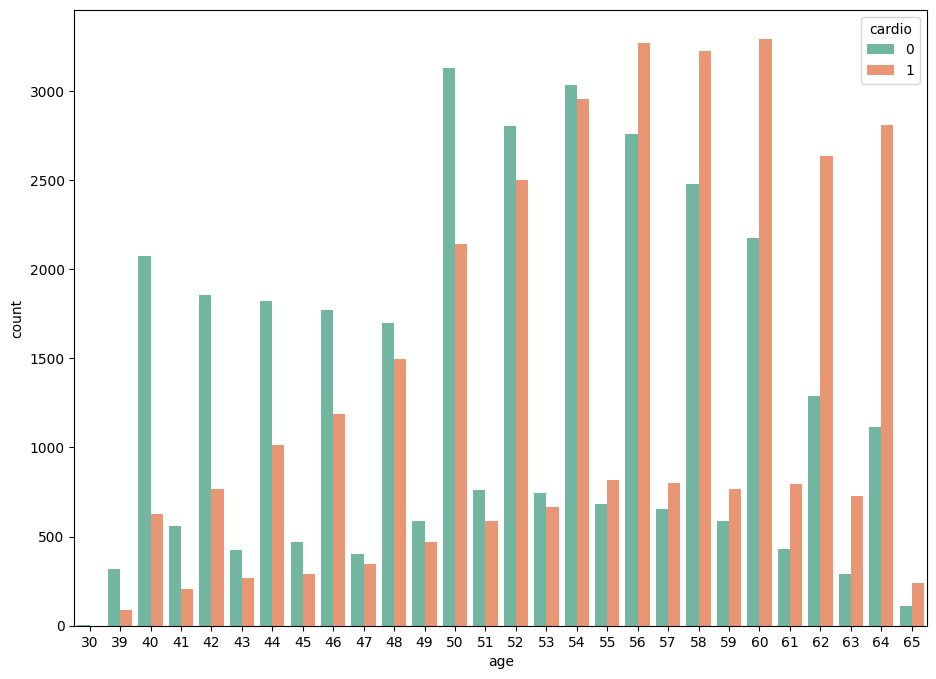

In [4]:
from matplotlib import rcParams                                     
import seaborn as sns
rcParams['figure.figsize'] = 11, 8
df['age'] = (df['age'] / 365).round().astype('int')
sns.countplot(x='age', hue='cardio', data = df, palette="Set2");

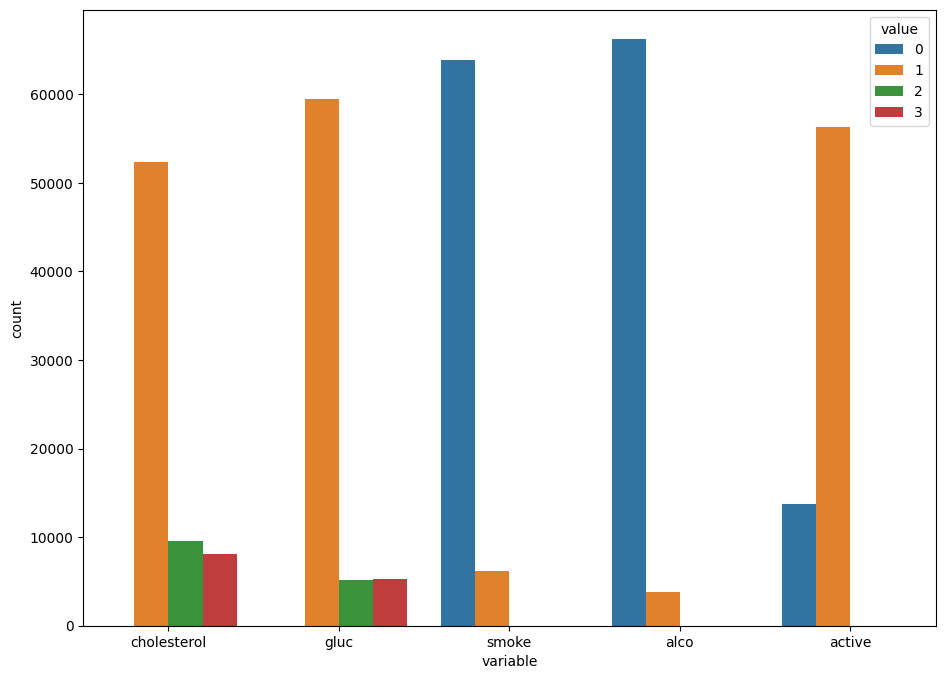

In [5]:
df_categorical = df.loc[:,['cholesterol','gluc', 'smoke', 'alco', 'active']]
sns.countplot(x="variable", hue="value",data= pd.melt(df_categorical));

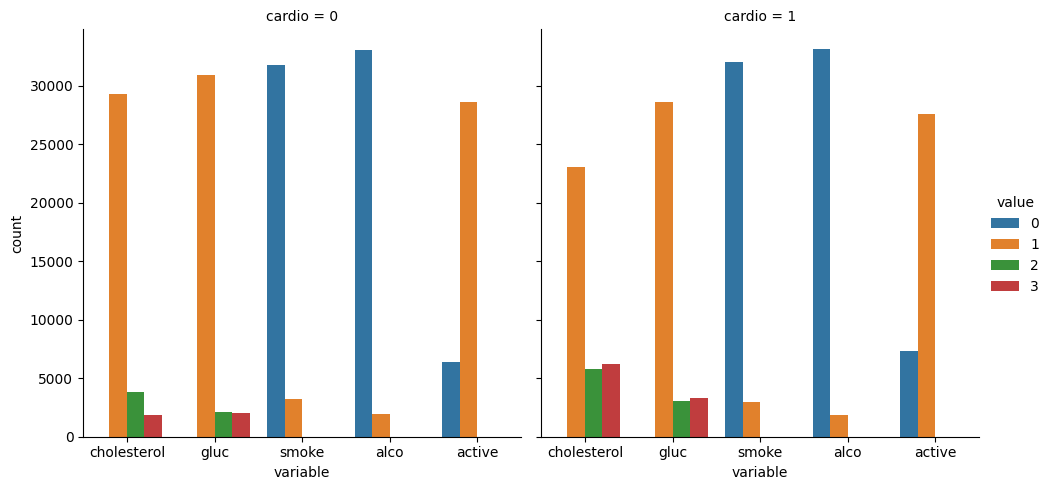

In [6]:
df_long = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active'])
sns.catplot(x="variable", hue="value", col='cardio',data=df_long, kind="count");

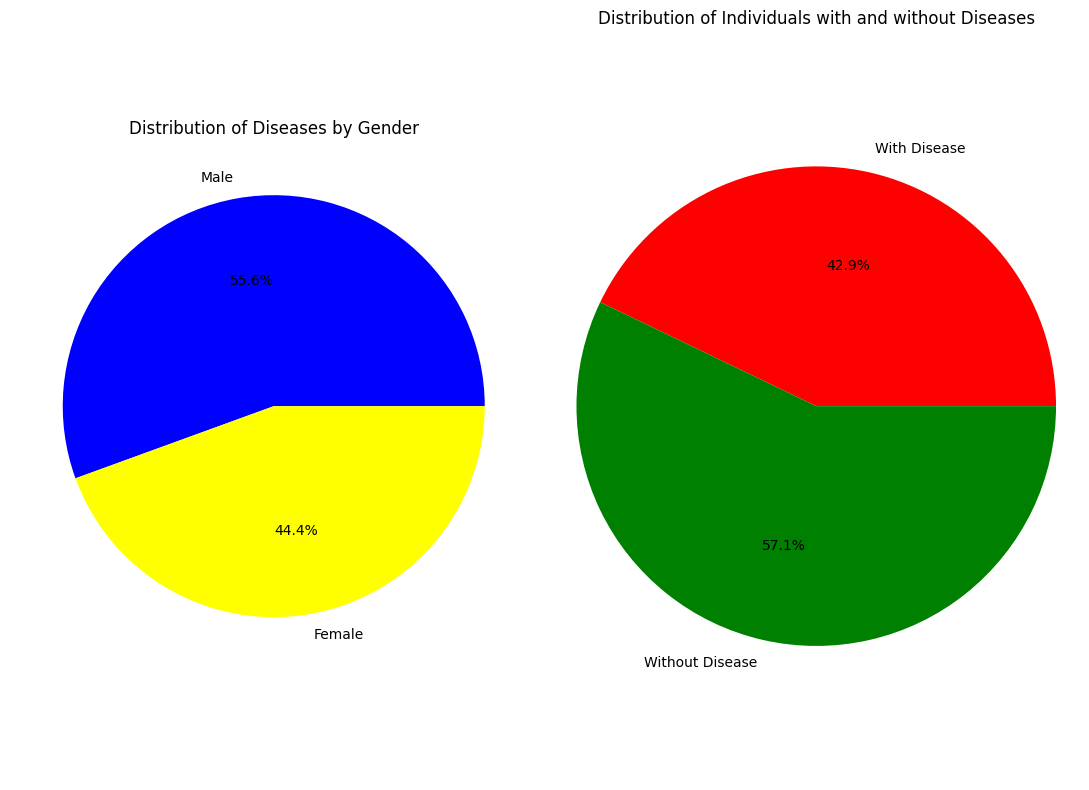

In [7]:
import matplotlib.pyplot as plt

diseases_male = 100
diseases_female = 80

with_disease = 150
without_disease = 200


disease_counts = [diseases_male, diseases_female]
gender_labels = ['Male', 'Female']
gender_colors = ['blue', 'yellow']

status_counts = [with_disease, without_disease]
status_labels = ['With Disease', 'Without Disease']
status_colors = ['red', 'green']


fig, (ax1, ax2) = plt.subplots(1, 2)


ax1.pie(disease_counts, labels=gender_labels, colors=gender_colors, autopct='%1.1f%%')
ax1.set_title('Distribution of Diseases by Gender')


ax2.pie(status_counts, labels=status_labels, colors=status_colors, autopct='%1.1f%%')
ax2.set_title('Distribution of Individuals with and without Diseases')

plt.axis('equal')
plt.tight_layout()
plt.show()



In [8]:
target=df["cardio"]

In [9]:
inputs=df.iloc[:,0:13]
inputs

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,62,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [10]:
inputs

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,62,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [11]:
target

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder
l_cholesterol=LabelEncoder()
l_gluc=LabelEncoder()
l_alco=LabelEncoder()
l_smoke=LabelEncoder()
l_active=LabelEncoder()

inputs['cholesterol_n']=l_cholesterol.fit_transform(inputs['cholesterol'])
inputs['gluc_n']=l_gluc.fit_transform(inputs['gluc'])
inputs['alco_n']=l_alco.fit_transform(inputs['alco'])
inputs['smoke_n']=l_smoke.fit_transform(inputs['smoke'])
inputs['active_n']=l_smoke.fit_transform(inputs['active'])

In [13]:
inputs

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,cholesterol_n,gluc_n,alco_n,smoke_n,active_n
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,0,0,0,0,1
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,2,0,0,0,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1,2,0,0,0,0
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,0,0,0,0,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53,2,168,76.0,120,80,1,1,1,0,1,0,0,0,0,1,1
69996,99995,62,1,158,126.0,140,90,2,2,0,0,1,1,1,1,0,0,1
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1,2,0,1,0,0
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1,0,1,0,0,0


In [14]:
updated=inputs.drop(["cholesterol","gluc","smoke","alco","active"],axis="columns")
updated
x=updated[["cholesterol_n","gluc_n","smoke_n","alco_n","active_n"]]
x

,cholesterol_n,gluc_n,smoke_n,alco_n,active_n
0,0,0,0,0,1
1,2,0,0,0,1
2,2,0,0,0,0
3,0,0,0,0,1
4,0,0,0,0,0
...,...,...,...,...,...
69995,0,0,1,0,1
69996,1,1,0,0,1
69997,2,0,0,1,0
69998,0,1,0,0,0


In [15]:
y=target
y

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8)

In [17]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [18]:
xtrain

,cholesterol_n,gluc_n,smoke_n,alco_n,active_n
8818,2,2,0,0,1
64019,2,2,0,0,1
61500,1,0,0,0,0
928,0,0,0,0,1
41260,0,0,0,0,1
...,...,...,...,...,...
35814,0,0,0,0,1
26928,0,0,0,0,0
46896,2,2,0,0,1
25921,1,0,0,0,0


In [19]:
ytrain

8818     0
64019    1
61500    0
928      0
41260    0
        ..
35814    0
26928    0
46896    1
25921    1
47985    1
Name: cardio, Length: 56000, dtype: int64

In [20]:
xtest

,cholesterol_n,gluc_n,smoke_n,alco_n,active_n
20985,0,0,0,0,1
49607,0,0,0,0,0
10702,1,1,0,0,1
62295,0,0,0,0,0
30119,1,0,0,0,1
...,...,...,...,...,...
15862,0,0,0,0,1
34841,0,0,0,0,1
10725,1,0,0,0,1
10574,0,2,0,0,1


In [21]:
ytest

20985    0
49607    0
10702    1
62295    0
30119    1
        ..
15862    0
34841    1
10725    1
10574    1
7228     0
Name: cardio, Length: 14000, dtype: int64

In [22]:
model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [23]:
model.predict(xtest)

array([0, 0, 1, ..., 1, 0, 1])

In [24]:
model.score(xtest,ytest)

0.5890714285714286

[Text(0.41388888888888886, 0.9375, 'x[0] <= 0.5\ngini = 0.5\nsamples = 56000\nvalue = [28046, 27954]'),
 Text(0.15185185185185185, 0.8125, 'x[4] <= 0.5\ngini = 0.493\nsamples = 41804\nvalue = [23444, 18360]'),
 Text(0.07037037037037037, 0.6875, 'x[1] <= 0.5\ngini = 0.5\nsamples = 8275\nvalue = [4239, 4036]'),
 Text(0.02962962962962963, 0.5625, 'x[3] <= 0.5\ngini = 0.5\nsamples = 7700\nvalue = [3971, 3729]'),
 Text(0.014814814814814815, 0.4375, 'x[2] <= 0.5\ngini = 0.5\nsamples = 7425\nvalue = [3821, 3604]'),
 Text(0.007407407407407408, 0.3125, 'gini = 0.5\nsamples = 7047\nvalue = [3634, 3413]'),
 Text(0.022222222222222223, 0.3125, 'gini = 0.5\nsamples = 378\nvalue = [187, 191]'),
 Text(0.044444444444444446, 0.4375, 'x[2] <= 0.5\ngini = 0.496\nsamples = 275\nvalue = [150, 125]'),
 Text(0.037037037037037035, 0.3125, 'gini = 0.485\nsamples = 128\nvalue = [75, 53]'),
 Text(0.05185185185185185, 0.3125, 'gini = 0.5\nsamples = 147\nvalue = [75, 72]'),
 Text(0.1111111111111111, 0.5625, 'x[2] <

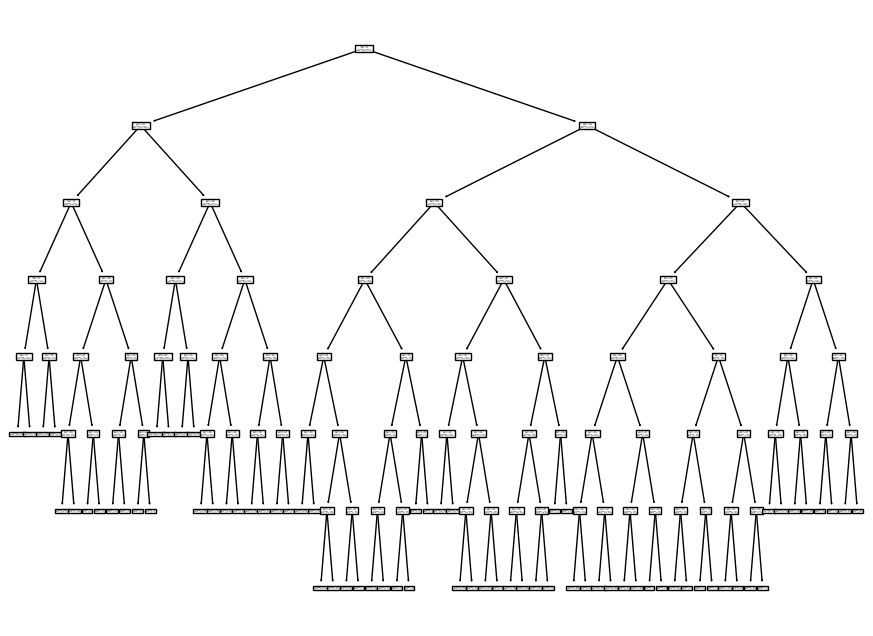

In [25]:
from sklearn import tree
tree.plot_tree(model)

In [26]:
#SUPPORT VECTOR MACHINE

df1= pd.read_csv("cardio_train.csv",sep=';')
df1.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [27]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8)

In [28]:
from sklearn.svm import SVC
model2=SVC()

In [29]:
model2.fit(xtrain,ytrain)


SVC()

In [30]:
pred=model2.predict(xtest)
pred

array([1, 0, 0, ..., 0, 0, 0])

In [31]:
model2.score(xtest,ytest)

0.5941428571428572

In [32]:
#KNN
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8)

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [34]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [35]:
knn.score(xtest,ytest)

0.571

In [36]:
knn.predict(xtest)

array([0, 0, 1, ..., 0, 0, 1])

In [37]:
#NAIVE BAYES 
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8)

In [38]:
xtest

,cholesterol_n,gluc_n,smoke_n,alco_n,active_n
48762,2,2,0,0,1
45167,2,0,0,0,1
21290,0,0,0,0,1
43825,0,0,0,0,1
19015,2,0,0,0,1
...,...,...,...,...,...
41670,0,0,0,0,0
16408,0,0,0,1,1
13200,0,0,0,0,0
68370,1,0,1,0,1


In [39]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(xtrain,ytrain)

GaussianNB()

In [40]:
model.score(xtest,ytest)

0.5828571428571429

In [41]:
model.predict(xtest)

array([1, 1, 0, ..., 0, 0, 1])

In [42]:
#RANDOMFOREST
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8)

In [43]:
from sklearn.ensemble import RandomForestClassifier
model3=RandomForestClassifier()
model3.fit(xtrain,ytrain)


RandomForestClassifier()

In [44]:
model3.score(xtest,ytest)

0.5856428571428571

In [45]:
#LOGISTIC REGRESSION
from sklearn import linear_model
logr = linear_model.LogisticRegression()
logr.fit(xtrain,ytrain)


LogisticRegression()

In [46]:
logr.score(xtest,ytest)

0.5854285714285714

In [47]:
logr.predict(xtest)

array([0, 0, 0, ..., 0, 0, 0])

In [48]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


data = pd.read_csv("cardio_train.csv", delimiter=";")
data = data.drop(columns=["id"])
features = data.iloc[:, :-1].values
labels = data.iloc[:, -1].values

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=42)


scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(train_features.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.fit(train_features, train_labels, epochs=10, batch_size=32, validation_data=(test_features, test_labels))

test_loss, test_acc = model.evaluate(test_features, test_labels)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)


predictions = model.predict(test_features)




Epoch 1/10
1750/1750 [==============================] - 7s 3ms/step - loss: 0.5917 - accuracy: 0.6995 - val_loss: 0.5694 - val_accuracy: 0.7211
Epoch 2/10
1750/1750 [==============================] - 6s 3ms/step - loss: 0.5594 - accuracy: 0.7275 - val_loss: 0.5607 - val_accuracy: 0.7356
Epoch 3/10
1750/1750 [==============================] - 4s 3ms/step - loss: 0.5514 - accuracy: 0.7291 - val_loss: 0.5599 - val_accuracy: 0.7344
Epoch 4/10
1750/1750 [==============================] - 4s 2ms/step - loss: 0.5472 - accuracy: 0.7326 - val_loss: 0.5459 - val_accuracy: 0.7364
Epoch 5/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.5450 - accuracy: 0.7330 - val_loss: 0.5456 - val_accuracy: 0.7383
Epoch 6/10
1750/1750 [==============================] - 4s 2ms/step - loss: 0.5421 - accuracy: 0.7344 - val_loss: 0.5434 - val_accuracy: 0.7400
Epoch 7/10
1750/1750 [==============================] - 4s 2ms/step - loss: 0.5429 - accuracy: 0.7333 - val_loss: 0.5476 - val_accuracy: